In [48]:
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)

player_raw_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")

session_data <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

#just some filler code for now
#tidy_session_data <- session_data |>
#                        mutate(start_time = as_datetime(start_time, format="%d/%m/%Y %H:%M")) |> #convert to date object
#                        mutate(end_time = as_datetime(end_time, format="%d/%m/%Y %H:%M")) |> #convert to date object
#                        mutate(session_length = end_time - start_time) #get session length


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,experience,played_hours,experience.Amateur,experience.Beginner,experience.Pro,experience.Regular,experience.Veteran
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pro,30.3,0,0,1,0,0
2,Veteran,3.8,0,0,0,0,1
3,Veteran,0.0,0,0,0,0,1
4,Amateur,0.7,1,0,0,0,0
5,Regular,0.1,0,0,0,1,0
6,Amateur,0.0,1,0,0,0,0
7,Regular,0.0,0,0,0,1,0
8,Amateur,0.0,1,0,0,0,0
9,Amateur,0.1,1,0,0,0,0


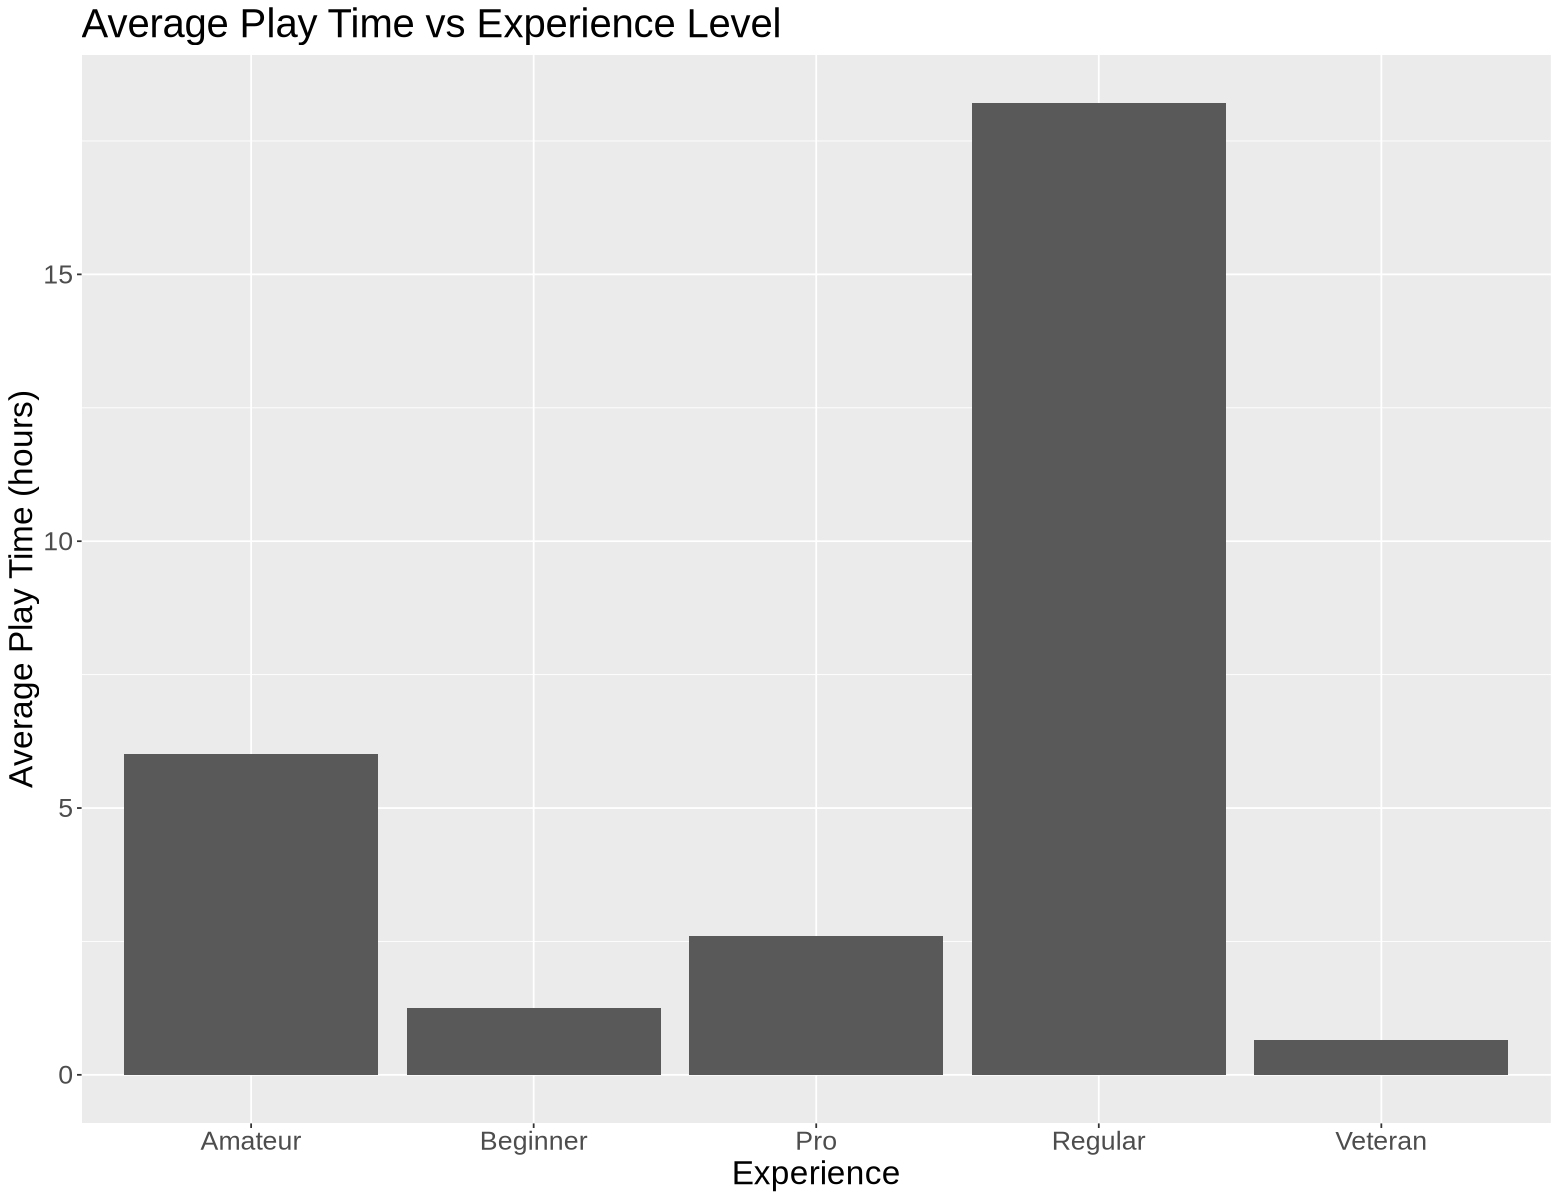

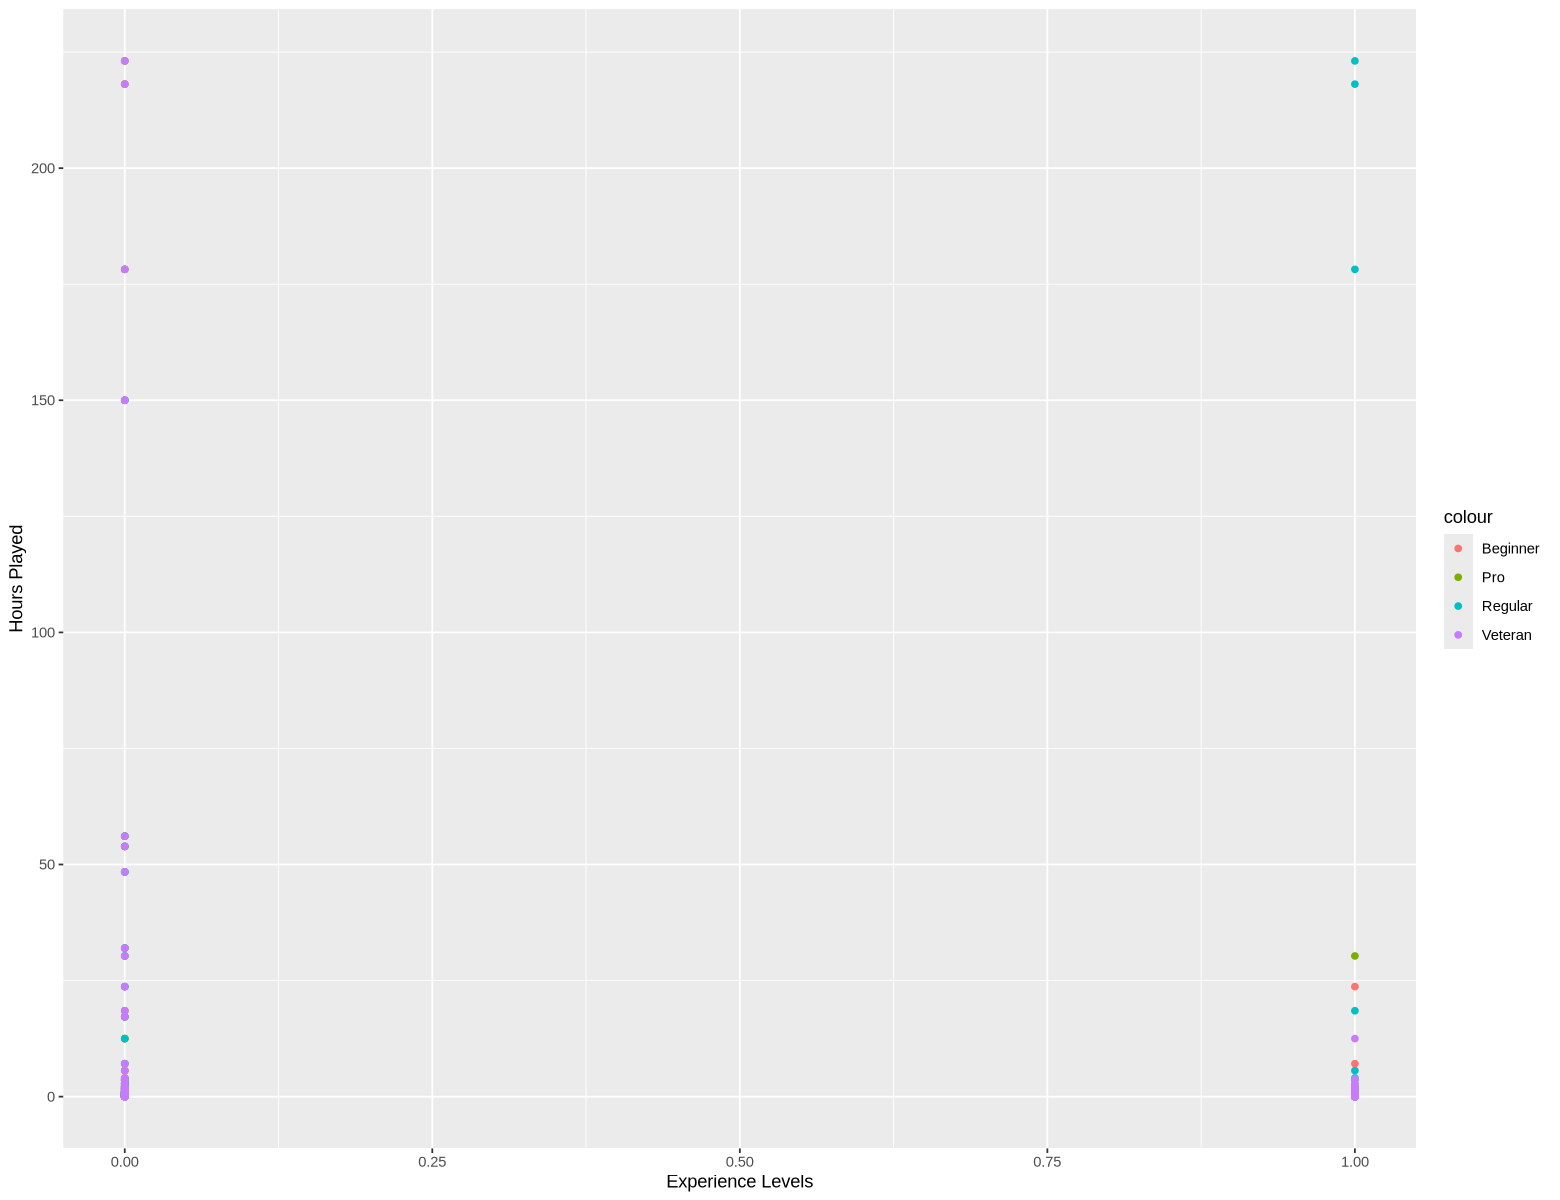

In [67]:
# For Experience vs Played Hours
options(repr.plot.width=13, repr.plot.height=10)

player_data <- player_raw_data |> 
                        select(experience, played_hours) |> # only using experience and played_hours
                        mutate(experience = as.factor(experience)) # converts experience from chr to fct

player_data_one_hot_encoding <- dummyVars(" ~ experience ", data=player_data) # one-hot encoding the data to convert categorical to numerical

encoded_player_data <- predict(player_data_one_hot_encoding, newdata=player_data) 

encoded_player_data <- cbind(player_data, encoded_player_data)
encoded_player_data

player_data_average_graph <- player_data |>
                        group_by(experience) |>
                        summarize(average = mean(played_hours)) |>  # average play hours for each experience group
                        ggplot(aes(experience, average)) + # graph
                        geom_bar(stat="identity") +
                        labs(x="Experience", y="Average Play Time (hours)", title="Average Play Time vs Experience Level") +
                        theme(text=element_text(size=20))

player_data_average_graph

encoded_player_graph <- ggplot(encoded_player_data, aes(x=experience.Amateur, y=played_hours, color="Amateur")) +
                            geom_point(aes(x=experience.Beginner, color="Beginner")) +
                            geom_point(aes(x=experience.Pro, color="Pro")) +
                            geom_point(aes(x=experience.Regular, color="Regular")) +
                            geom_point(aes(x=experience.Veteran, color="Veteran")) +
                            labs(x="Experience Levels", y="Hours Played")

encoded_player_graph
# Training

player_split <- initial_split(player_data, prop=0.75) 
player_training <- training(player_split) 
player_testing <- testing(player_split)

